In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Other Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,training_total_meetings,training_price,discount_training,satisfaction_level,training_session,number_of_perticipant,training_type,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,5,...,17,6000000.0,50,5,17,20,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Customer Service Excellence For Basic and Fron...
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,5,...,17,6000000.0,50,5,17,19,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Customer Service Excellence For Basic and Fron...
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,5,...,14,6000000.0,50,5,17,20,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Customer Service Excellence For Basic and Fron...
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,5,...,17,6000000.0,50,5,17,19,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Customer Service Excellence For Basic and Fron...
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,17,6000000.0,50,5,17,18,Other Series,Customer Service Excellence For Basic and Fron...,Health and Safety Environment,Health and Safety Environment


## Univariatee Analysis

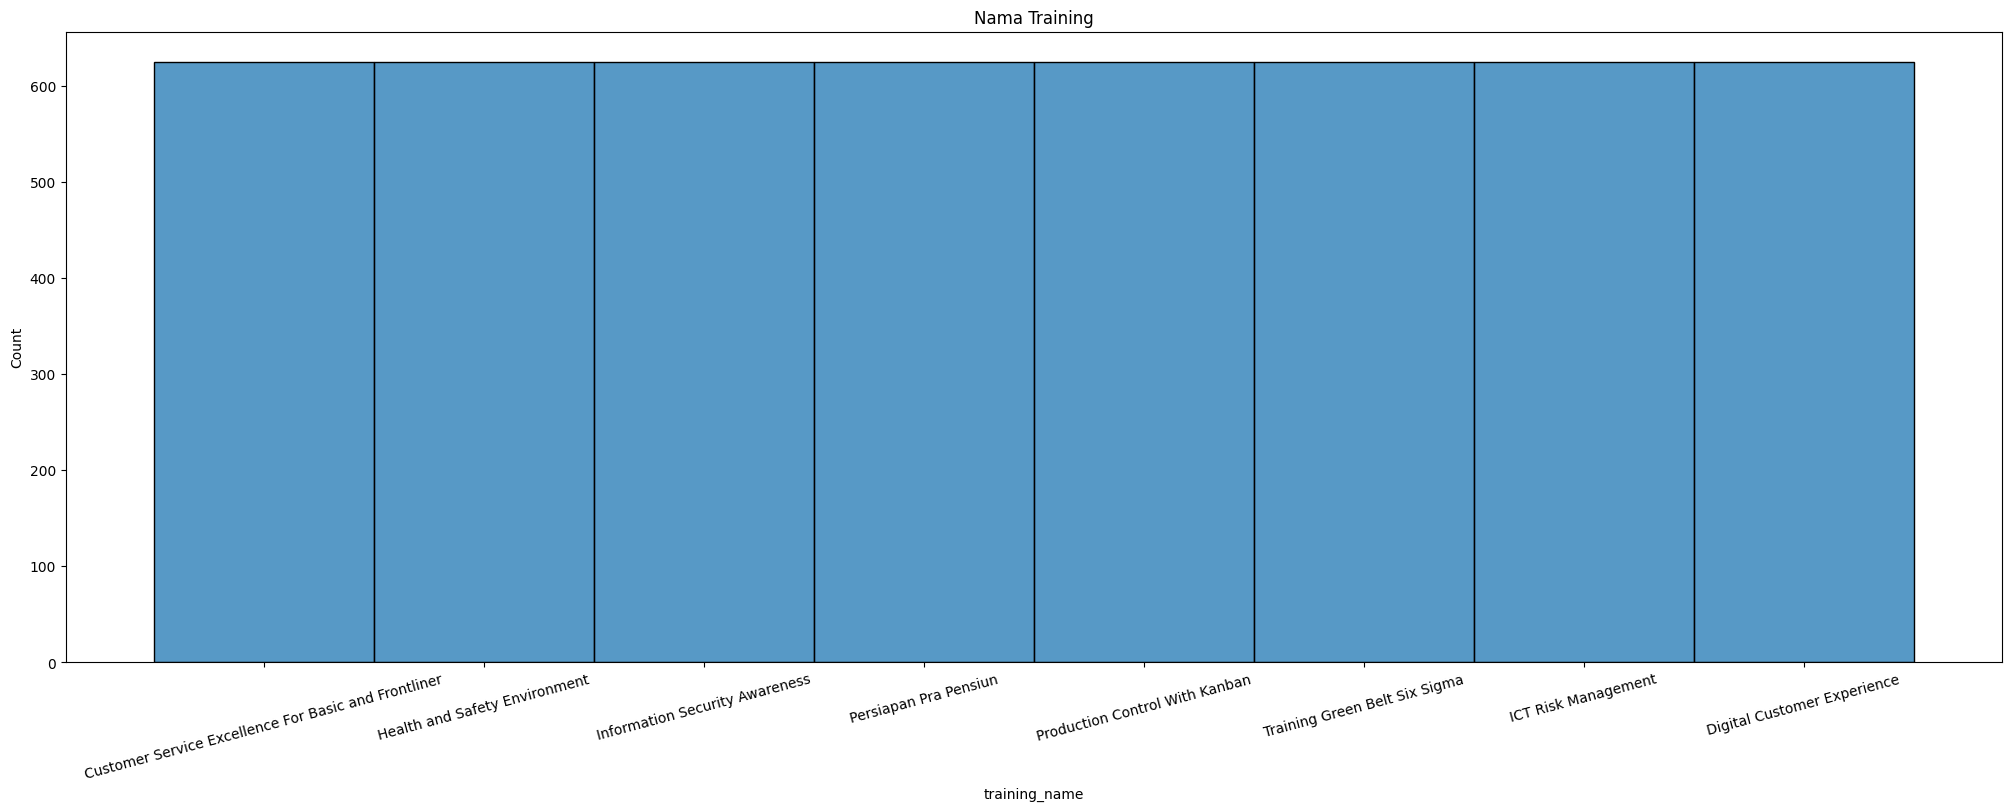

Customer Service Excellence For Basic and Frontliner    625
Health and Safety Environment                           625
Information Security Awareness                          625
Persiapan Pra Pensiun                                   625
Production Control With Kanban                          625
Training Green Belt Six Sigma                           625
ICT Risk Management                                     625
Digital Customer Experience                             625
Name: training_name, dtype: int64


In [3]:
# training_name
fig, ax = plt.subplots(figsize=(20, 8), layout="constrained")
sns.histplot(data=df["training_name"], ax=ax)
ax.set_title("Nama Training")
plt.xticks(rotation=15)
plt.show()
print(df["training_name"].value_counts())

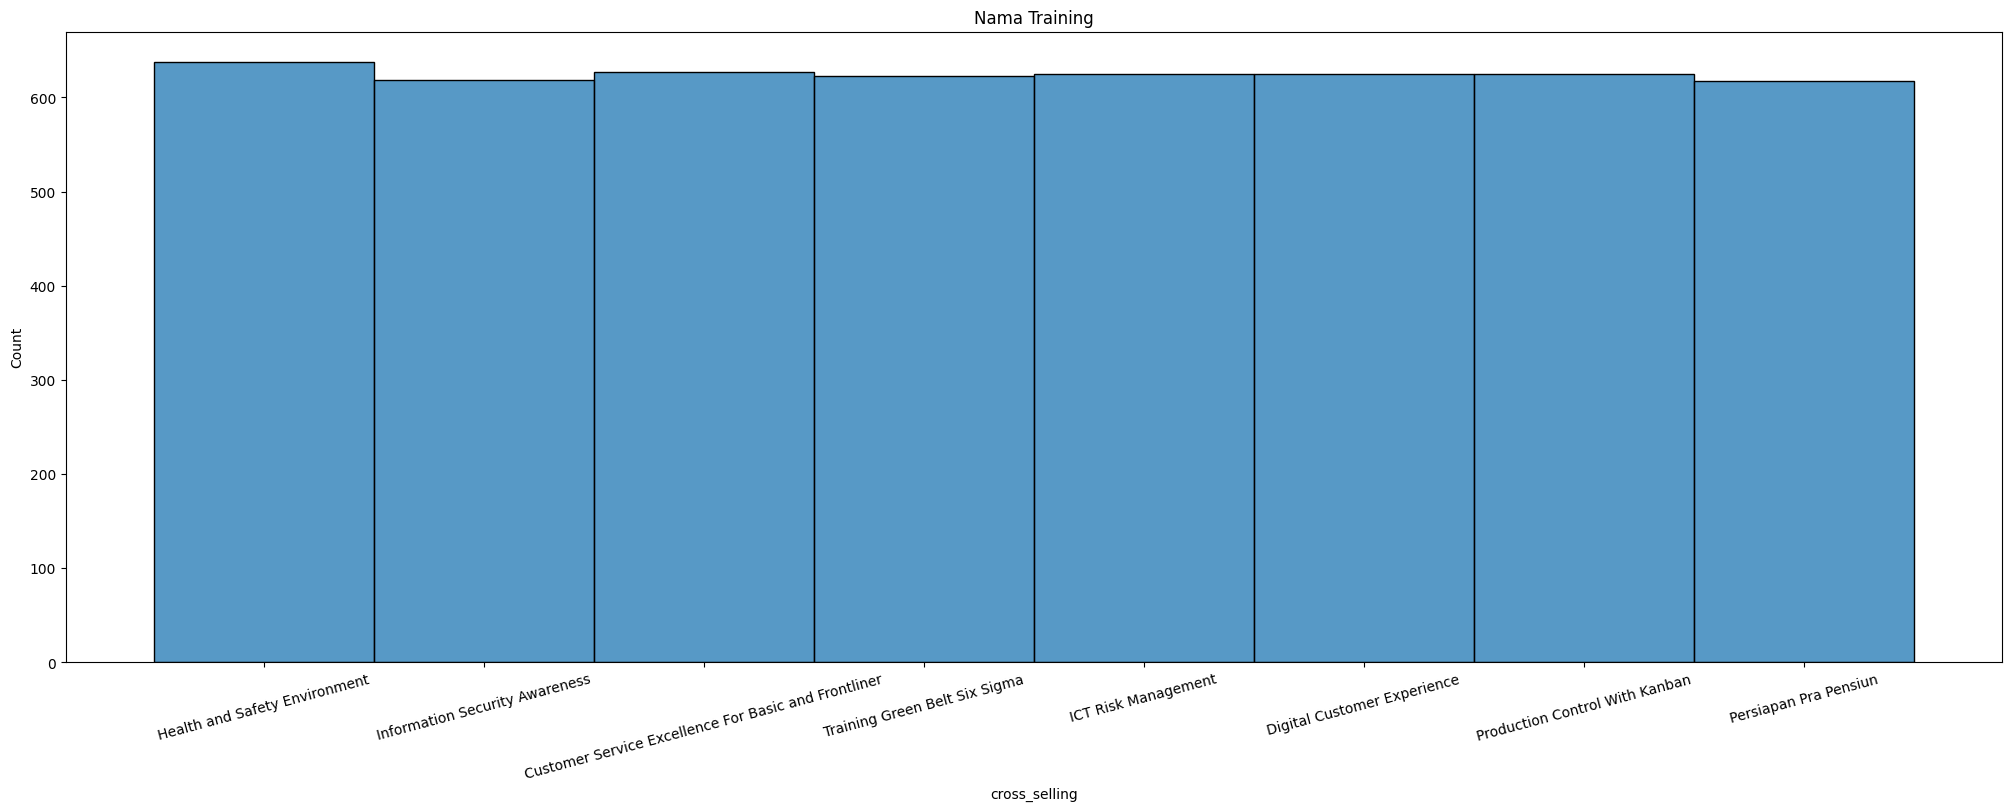

Health and Safety Environment                           638
Customer Service Excellence For Basic and Frontliner    627
ICT Risk Management                                     625
Digital Customer Experience                             625
Production Control With Kanban                          625
Training Green Belt Six Sigma                           623
Information Security Awareness                          619
Persiapan Pra Pensiun                                   618
Name: cross_selling, dtype: int64


In [4]:
# Cross Selling
fig, ax = plt.subplots(figsize=(20, 8), layout="constrained")
sns.histplot(data=df["cross_selling"], ax=ax)
ax.set_title("Nama Training")
plt.xticks(rotation=15)
plt.show()
print(df["cross_selling"].value_counts())

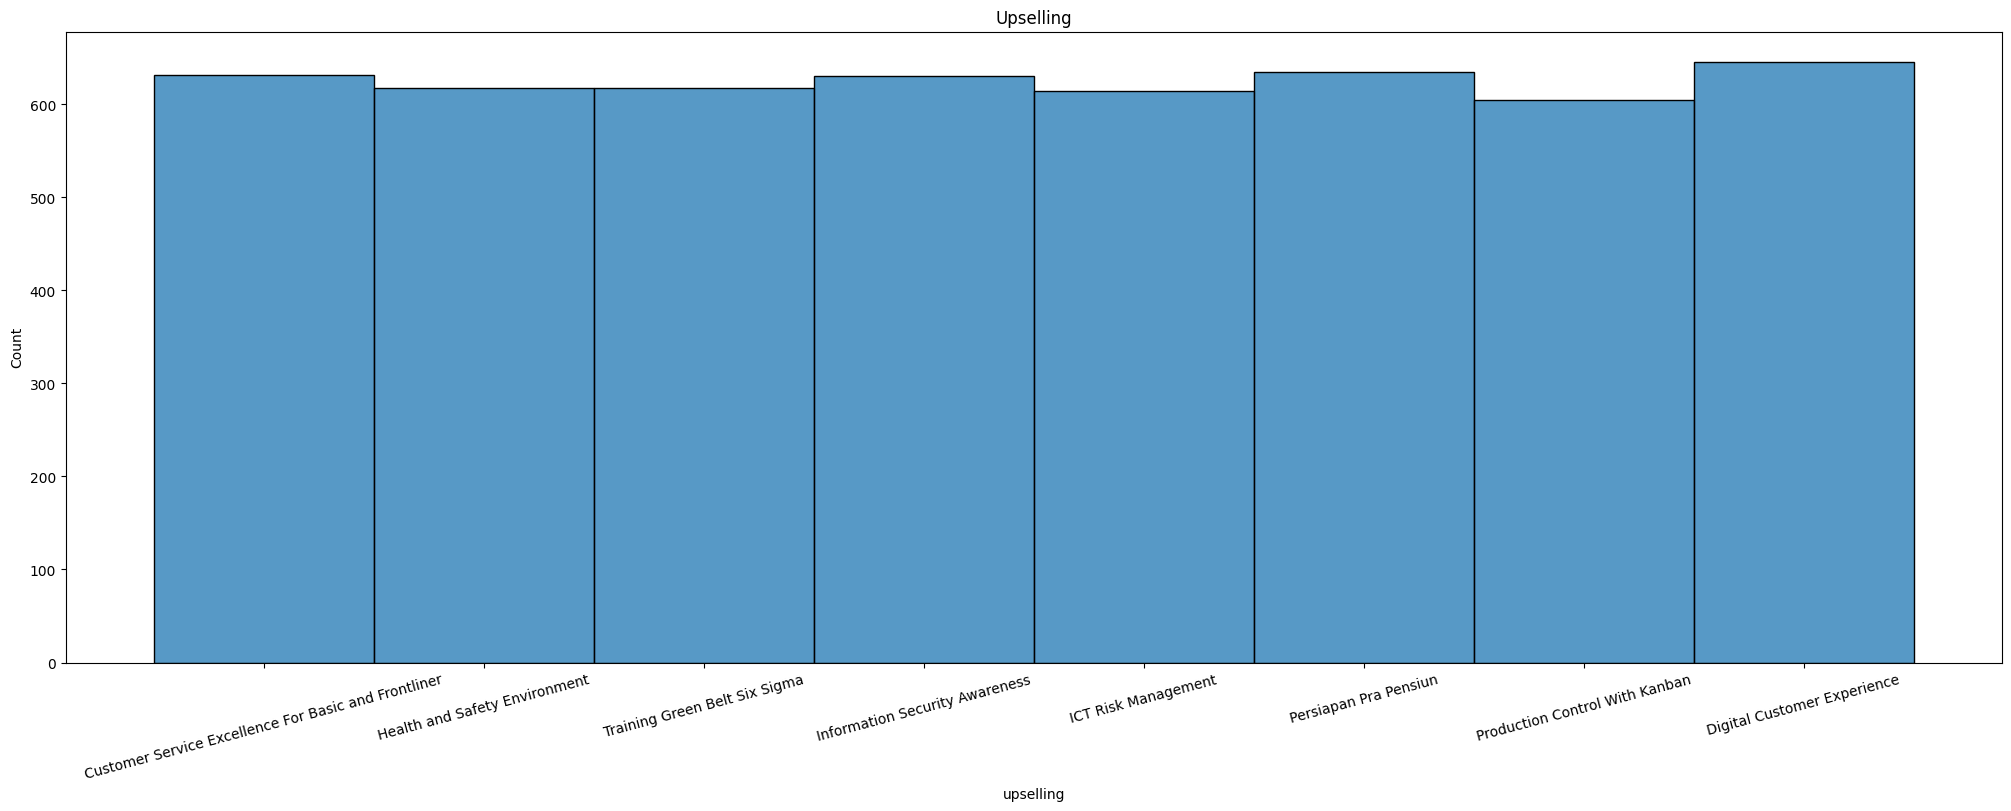

Digital Customer Experience                             646
Persiapan Pra Pensiun                                   635
Customer Service Excellence For Basic and Frontliner    632
Information Security Awareness                          631
Health and Safety Environment                           618
Training Green Belt Six Sigma                           618
ICT Risk Management                                     615
Production Control With Kanban                          605
Name: upselling, dtype: int64


In [5]:
# Upselling
fig, ax = plt.subplots(figsize=(20, 8), layout="constrained")
sns.histplot(data=df["upselling"], ax=ax)
ax.set_title("Upselling")
plt.xticks(rotation=15)
plt.show()
print(df["upselling"].value_counts())

<Axes: >

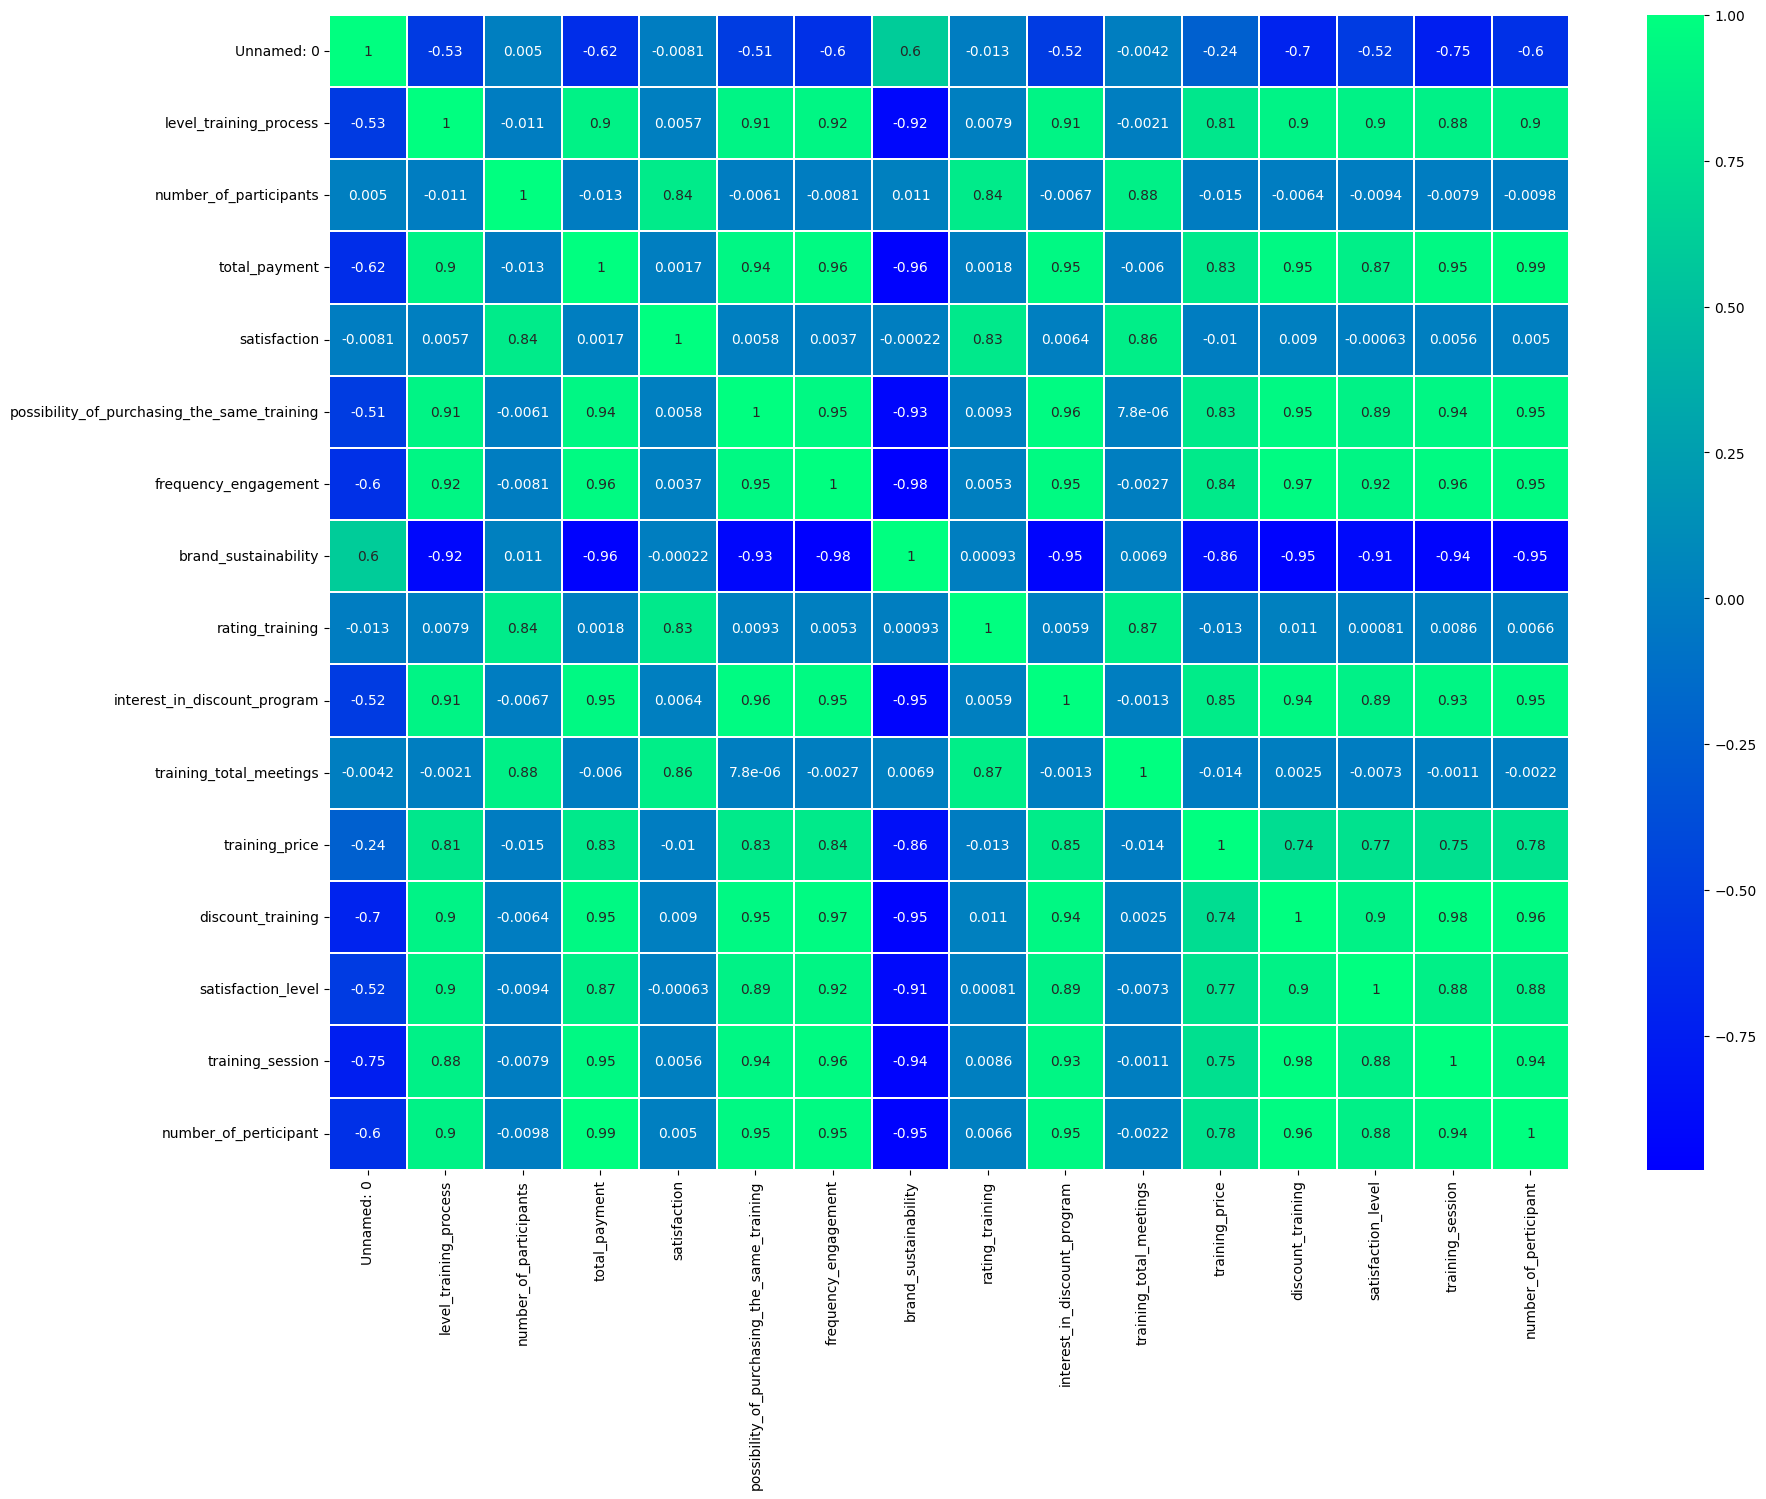

In [6]:
num_columns = [i for i in df.columns if df[i].dtype != "object"]
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data=df[num_columns].corr(), annot=True, linewidths=.2, linecolor="white", cmap="winter", ax=ax)

<Axes: >

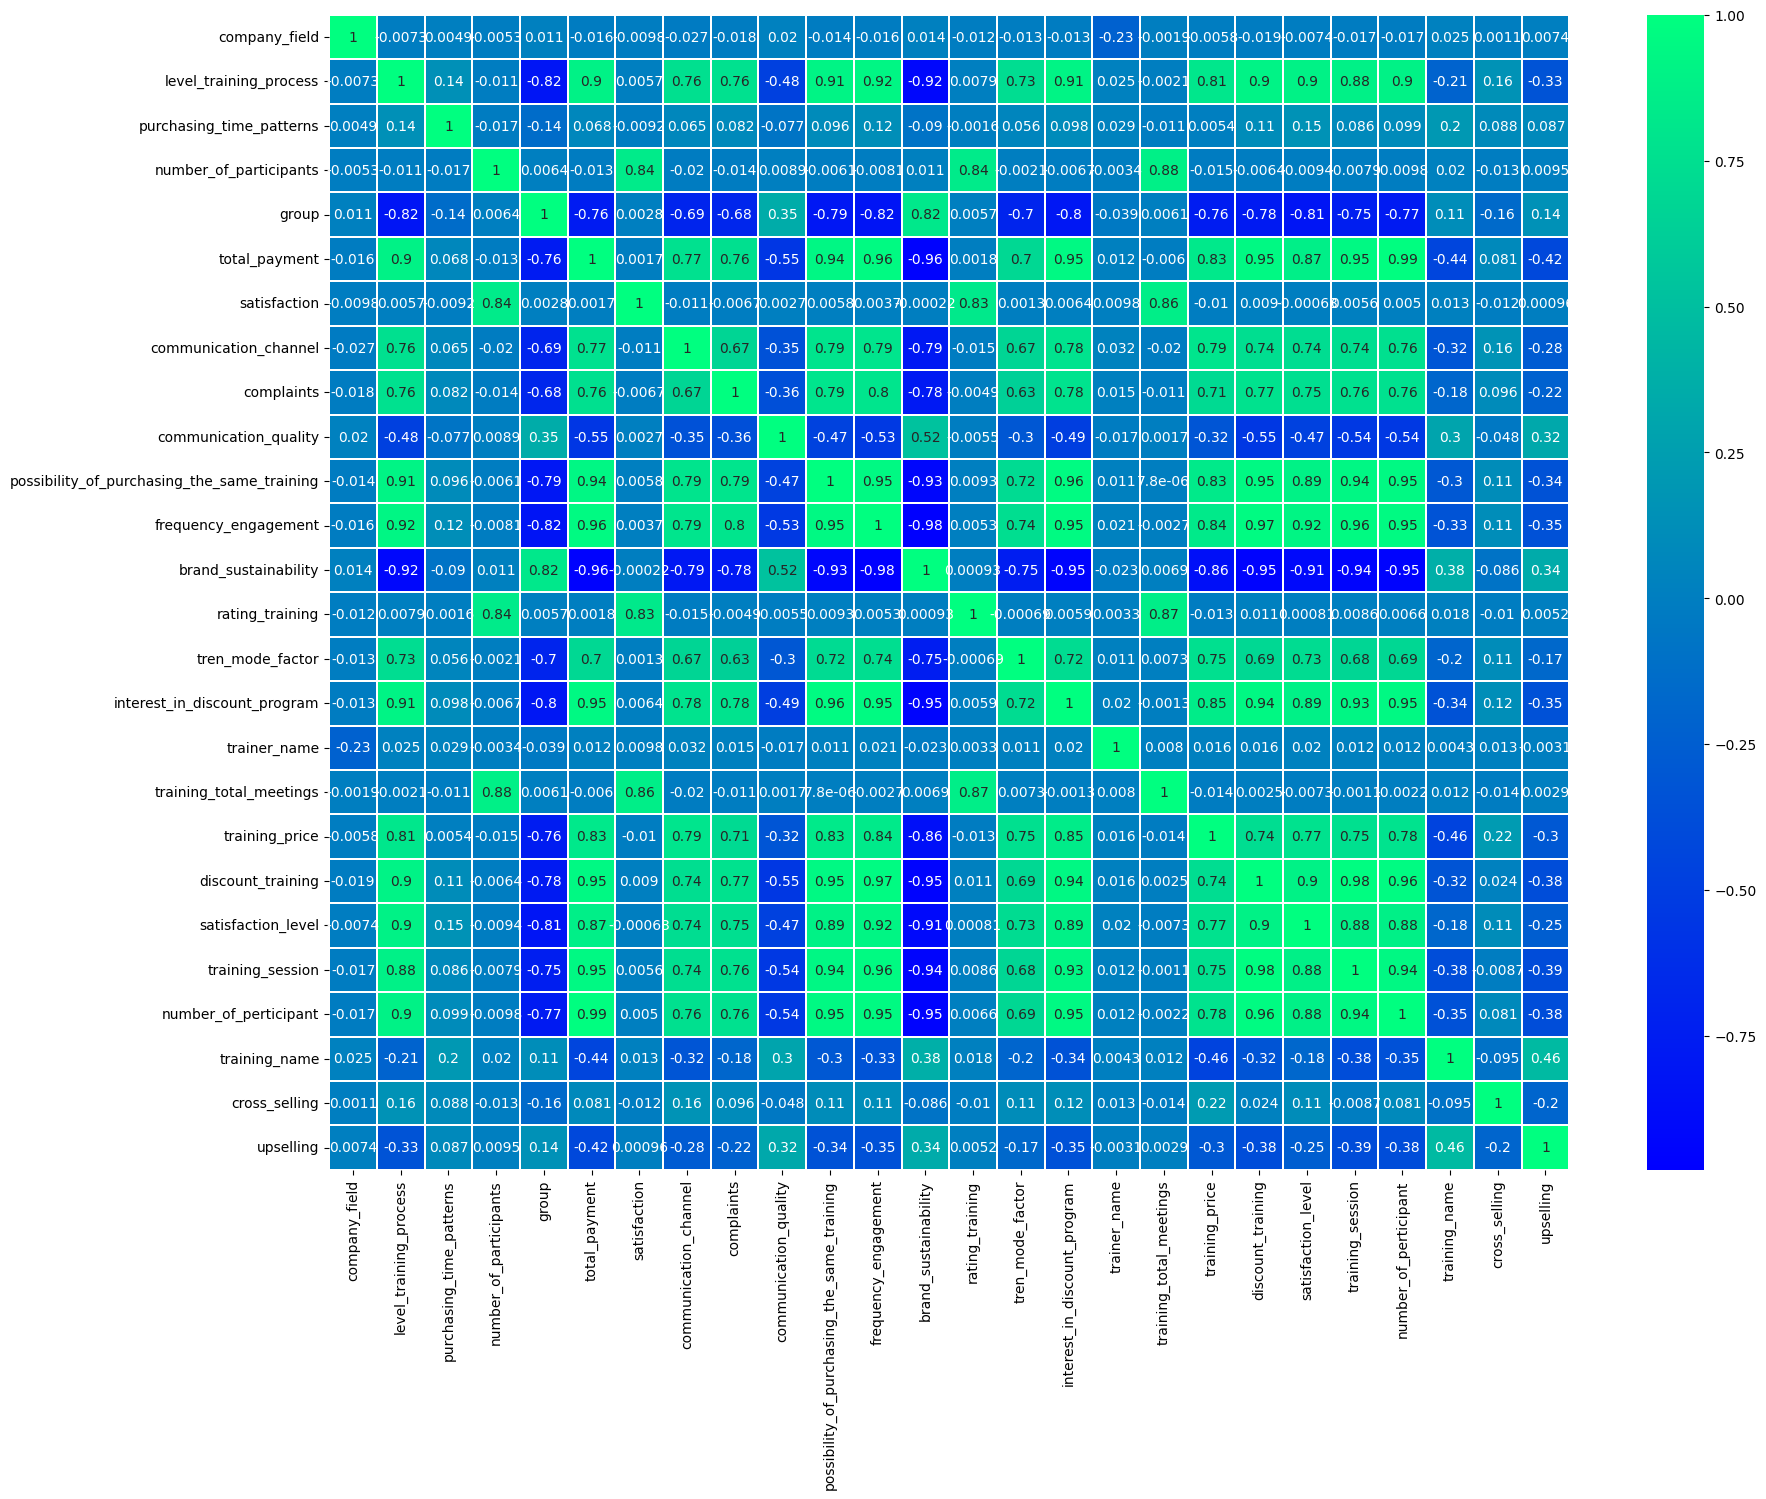

In [7]:
from sklearn.preprocessing import LabelEncoder
# Scaling category variable

columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])

df.drop([
    "Unnamed: 0", "company_ID", "company_name", "company_pic", "company_address", "company_phone", "company_email",
    "transaction_date", "training_type", "training_ID"
], axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data=df.corr(), annot=True, linewidths=.2, linecolor="white", cmap="winter", ax=ax)